In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True) # Use in Google Colab
#root_path = 'gdrive/My Drive/Colab Notebooks/CS230_PROJECT' # Former path used in Google Colab

# Ricardo Carrillo AWS path
root_path = '/home/ubuntu/cs230' 

Using TensorFlow backend.


In [2]:
import os
os.getcwd()
! pip show tensorflow

Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages
Requires: protobuf, termcolor, numpy, tensorboard, keras-applications, keras-preprocessing, opt-einsum, google-pasta, gast, astor, six, wrapt, grpcio, wheel, absl-py, tensorflow-estimator
Required-by: tensorflow-serving-api, keras-tuner


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
files = [f"{root_path}/stock_data/{f}" for f in os.listdir(f"{root_path}/stock_data")]
print(files)

['/home/ubuntu/cs230/stock_data/NDAQ.csv', '/home/ubuntu/cs230/stock_data/EXPD.csv', '/home/ubuntu/cs230/stock_data/INCY.csv', '/home/ubuntu/cs230/stock_data/ZION.csv', '/home/ubuntu/cs230/stock_data/NTRS.csv', '/home/ubuntu/cs230/stock_data/ALL.csv', '/home/ubuntu/cs230/stock_data/TXN.csv', '/home/ubuntu/cs230/stock_data/AFL.csv', '/home/ubuntu/cs230/stock_data/ARE.csv', '/home/ubuntu/cs230/stock_data/DVA.csv', '/home/ubuntu/cs230/stock_data/FDX.csv', '/home/ubuntu/cs230/stock_data/MGM.csv', '/home/ubuntu/cs230/stock_data/QCOM.csv', '/home/ubuntu/cs230/stock_data/CHTR.csv', '/home/ubuntu/cs230/stock_data/BAX.csv', '/home/ubuntu/cs230/stock_data/CVX.csv', '/home/ubuntu/cs230/stock_data/ALLE.csv', '/home/ubuntu/cs230/stock_data/APC.csv', '/home/ubuntu/cs230/stock_data/PKI.csv', '/home/ubuntu/cs230/stock_data/APH.csv', '/home/ubuntu/cs230/stock_data/NOV.csv', '/home/ubuntu/cs230/stock_data/HBAN.csv', '/home/ubuntu/cs230/stock_data/SNPS.csv', '/home/ubuntu/cs230/stock_data/URI.csv', '/hom

In [5]:
df = pd.DataFrame() # Initializing Dataset

In [6]:
for file in files:
            print(file)
            #Read in file -- note that parse_dates will be need later
            df0 = pd.read_csv(file)
            df = df.append(df0)

/home/ubuntu/cs230/stock_data/NDAQ.csv
/home/ubuntu/cs230/stock_data/EXPD.csv
/home/ubuntu/cs230/stock_data/INCY.csv
/home/ubuntu/cs230/stock_data/ZION.csv


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


/home/ubuntu/cs230/stock_data/NTRS.csv
/home/ubuntu/cs230/stock_data/ALL.csv
/home/ubuntu/cs230/stock_data/TXN.csv
/home/ubuntu/cs230/stock_data/AFL.csv
/home/ubuntu/cs230/stock_data/ARE.csv
/home/ubuntu/cs230/stock_data/DVA.csv
/home/ubuntu/cs230/stock_data/FDX.csv
/home/ubuntu/cs230/stock_data/MGM.csv
/home/ubuntu/cs230/stock_data/QCOM.csv
/home/ubuntu/cs230/stock_data/CHTR.csv
/home/ubuntu/cs230/stock_data/BAX.csv
/home/ubuntu/cs230/stock_data/CVX.csv
/home/ubuntu/cs230/stock_data/ALLE.csv
/home/ubuntu/cs230/stock_data/APC.csv
/home/ubuntu/cs230/stock_data/PKI.csv
/home/ubuntu/cs230/stock_data/APH.csv
/home/ubuntu/cs230/stock_data/NOV.csv
/home/ubuntu/cs230/stock_data/HBAN.csv
/home/ubuntu/cs230/stock_data/SNPS.csv
/home/ubuntu/cs230/stock_data/URI.csv
/home/ubuntu/cs230/stock_data/AEE.csv
/home/ubuntu/cs230/stock_data/PPL.csv
/home/ubuntu/cs230/stock_data/MCO.csv
/home/ubuntu/cs230/stock_data/HSIC.csv
/home/ubuntu/cs230/stock_data/NAVI.csv
/home/ubuntu/cs230/stock_data/MAR.csv
/hom

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [7]:
# Total Size of the Quandl Dataset 634525 Samples
len(df)

634525

In [8]:
# Drop Samples with NaN values, final set 373
df=df.dropna() # Just drop samples with Nan 
len(df)

373739

In [9]:
# Former links to download prototypes datasets in Colab and AWS
#df = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/MSFT_Premium.csv')
#df = pd.read_csv('/home/ubuntu/cs230/MSFT_Premium.csv')

In [10]:
# To check our new dataset
df.head

<bound method NDFrame.head of             accoci        assets     assetsavg       assetsc      assetsnc  \
4    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
5    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
6    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
7    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
8    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
9    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
10   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
11   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
12   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
13   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
14   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
15   -8.691000e+06  2.925504e+09  

In [11]:
# We made 9 list to explore differents sizes of datasets
features_considered = ['open','high','low','close']
# 4 features
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x']
# 13 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','assetturnover','de','debt','divyield','dps','ebit','ebitda','ebitdamargin','ebt','eps','epsdil','equity','ev_y','evebit_y','evebitda_y','gp','grossmargin','invcap','inventory','investments','liabilities','marketcap_y','netinc','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','ps_y','ps1','receivables','revenue','rnd','roa','roe','roic','ros']
# 54 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','deposits','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','fxusd','gp','grossmargin','intangibles','intexp','invcap','invcapavg','inventory','investments','investmentsc','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netincdis','netincnci','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','prefdivis','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharefactor','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
# 41 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','assetturnover','de','debt','divyield','dps','ebit','ebitda','ebitdamargin','ebt','eps','epsdil','equity','ev_y','evebit_y','evebitda_y','gp','grossmargin','invcap','inventory','investments','liabilities','marketcap_y','netinc','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','ps_y','ps1','receivables','revenue','rnd','roa','roe','roic','ros']
# 41 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt']
# 54 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin']
# 77 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin']
# 98 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp']
# 109 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
#print(len(features_considered))
features = df[features_considered]
features.index = df['date']
features.head()

,open,high,low,close
date,,,,
2014-05-08,41.74,44.43,41.530,43.42
2014-05-09,43.26,43.44,42.880,43.32
2014-05-12,43.37,44.13,43.350,43.86
2014-05-13,43.80,44.69,43.691,44.60
2014-05-14,44.50,44.72,44.280,44.66


In [12]:
TRAIN_SPLIT=np.int(len(df)*0.9) # Split 90-5-5
#features[:,4] = np.log(features[:,4])
dataset = features.values # Convert dataset in a numpy array
#dataset[:,4] = np.log(dataset[:,4]) # Log apply to the volumen 
#print(dataset)
#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_mean = dataset.mean(axis=0)
print(data_mean[3])
#print(data_mean)
#data_std = dataset[:TRAIN_SPLIT].std(axis=0)
data_std = dataset.std(axis=0)
#print(data_std)
dataset = (dataset-data_mean)/data_std
#dataset[:,4] = np.log(dataset[4,:])

107.3362893249032


In [13]:
for i in range(0,4):
    print(max(dataset[:,i]),min(dataset[:,i]))
    #print(min(dataset[:,i]))


13.866679103092071 -0.6967913920138181
13.85157293854501 -0.6968733820833677
13.766333347811981 -0.6965026424460724
13.835957205636177 -0.6969307773457217


In [14]:
def plot_series(time, series, format="-", start=0, end=None,set=df):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

time=np.arange(len(dataset),dtype="float32")
series_original=(dataset*data_std)+data_mean # To plot the Original Values
plot_series(time, series_original[:,3])

In [15]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  #print(labels)
  return np.array(data), np.array(labels)

In [16]:
past_history = 20 #Days taking in the past of each Sample
future_target = 0 # future_target + STEP = days forescat in the future
STEP = 1
np.random.seed(3)

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 3], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 3],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [17]:
# Test to see one x_train and y_train sample 
print ('Single window of past history : {}'.format(x_train_single[0,:])) # check
print ('Single window of past history : {}'.format(x_train_single[0].shape)) # check
print ('Single sample of Future : {}'.format(y_train_single[0,])) # check
print(dataset[0:21,:]) # dataset Check


Single window of past history : [[-0.43232582 -0.41770102 -0.43074106 -0.4213658 ]
 [-0.42230619 -0.42416758 -0.42175363 -0.42202505]
 [-0.42158108 -0.41966059 -0.41862467 -0.41846512]
 [-0.41874658 -0.41600274 -0.41635451 -0.4135867 ]
 [-0.41413227 -0.41580678 -0.41243333 -0.41319115]
 [-0.4138686  -0.4075113  -0.41223361 -0.40481872]
 [-0.40424448 -0.40222048 -0.40164842 -0.40264321]
 [-0.40332162 -0.40280835 -0.40078296 -0.4031706 ]
 [-0.40411264 -0.40653152 -0.40451108 -0.40706016]
 [-0.40556285 -0.40744598 -0.40637514 -0.4079831 ]
 [-0.40773817 -0.40888299 -0.40517682 -0.40653276]
 [-0.40622204 -0.40783789 -0.40431136 -0.40508242]
 [-0.40424448 -0.40744598 -0.40517682 -0.40659869]
 [-0.40668347 -0.40744598 -0.40544311 -0.40468687]
 [-0.40674939 -0.40907895 -0.4069743  -0.40791718]
 [-0.40833143 -0.40947086 -0.40624199 -0.40758755]
 [-0.40701306 -0.40809917 -0.40444451 -0.40514834]
 [-0.40582653 -0.4085564  -0.40557626 -0.4087742 ]
 [-0.40905654 -0.41012405 -0.40584255 -0.40732386]

In [18]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000 # Previous len(df)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [19]:
#print(val_data_single)
#print(x_val_single.shape)
#print(y_val_single.shape)
#print(x_train_single.shape[-2:])
#print(dataset[0:30,:].shape)
for x,y in train_data_single.take(1):
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  

x =  [[[-0.39916874 -0.40169793 -0.40184814 -0.40508242]
  [-0.40292611 -0.40418004 -0.40184814 -0.40366504]
  [-0.40055304 -0.40378813 -0.40005065 -0.40237951]
  ...
  [-0.40859511 -0.41103851 -0.41163445 -0.41411409]
  [-0.41222063 -0.41423913 -0.41349851 -0.41582813]
  [-0.4167031  -0.4176357  -0.41482998 -0.41483926]]

 [[-0.37649273 -0.37962019 -0.37521872 -0.37798739]
  [-0.37787702 -0.38046933 -0.37688306 -0.37746   ]
  [-0.37767927 -0.38092656 -0.37575131 -0.37798739]
  ...
  [-0.37075781 -0.37361086 -0.36946011 -0.37099938]
  [-0.37161475 -0.37289236 -0.37162375 -0.37001051]
  [-0.36983495 -0.37240247 -0.37635047 -0.36941719]]

 [[-0.4050355  -0.40199186 -0.40251388 -0.40059954]
  [-0.39857548 -0.40013028 -0.39898548 -0.39829218]
  [-0.39765262 -0.4009141  -0.3989189  -0.40026992]
  ...
  [-0.39303831 -0.39483946 -0.39452505 -0.39750109]
  [-0.39600465 -0.3970603  -0.39385931 -0.39404004]
  [-0.39284055 -0.39549265 -0.3911298  -0.39315006]]

 ...

 [[-0.37023046 -0.37289236 -0

We add forget_bias (default: 1) to the biases of the forget gate in order to reduce the scale of forgetting in the beginning of the training.

In [36]:
from keras import regularizers

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
TIME_STEPS=past_history
EPOCHS=50
EVALUATION_INTERVAL=200

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,input_shape=x_train_single.shape[-2:]
                                           ,return_sequences=True,activation='tanh',kernel_initializer='glorot_uniform'
                                           ,activity_regularizer=regularizers.l1(0.01)))
single_step_model.add(tf.keras.layers.LSTM(16,return_sequences=False,activation='tanh',kernel_initializer='glorot_uniform'
                                           ,activity_regularizer=regularizers.l1(0.01)))
single_step_model.add(tf.keras.layers.Dense(16,activation='tanh'))
#single_step_model.add(tf.keras.layers.Dropout(0.2))
#single_step_model.add(tf.keras.layers.Dense(16,activation='tanh'))
single_step_model.add(tf.keras.layers.Dense(8,activation='tanh'))
single_step_model.add(tf.keras.layers.Dense(1))

# Optimizers PRE-DEFINED to Tests
optimizeAdam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
optimizeAdam1=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
optimizeRMS=tf.keras.optimizers.RMSprop()
optimizeSGD =tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
optimizeSGD1 =tf.keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

# Compile & Fit
single_step_model.compile(optimizer=optimizeAdam, loss='mae',metrics=["mae"])

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)



Train for 200 steps, validate for 50 steps
Epoch 1/50
200/200 [==============================] - 12s 60ms/step - loss: 0.1336 - mae: 0.0365 - val_loss: 0.0640 - val_mae: 0.0302
Epoch 2/50
200/200 [==============================] - 5s 27ms/step - loss: 0.2335 - mae: 0.1893 - val_loss: 0.0609 - val_mae: 0.0407
Epoch 3/50
200/200 [==============================] - 5s 27ms/step - loss: 0.0663 - mae: 0.0523 - val_loss: 0.0388 - val_mae: 0.0267
Epoch 4/50
200/200 [==============================] - 5s 27ms/step - loss: 0.0298 - mae: 0.0190 - val_loss: 0.0301 - val_mae: 0.0197
Epoch 5/50
200/200 [==============================] - 5s 27ms/step - loss: 0.3749 - mae: 0.3551 - val_loss: 0.0546 - val_mae: 0.0440
Epoch 6/50
200/200 [==============================] - 5s 27ms/step - loss: 0.0252 - mae: 0.0174 - val_loss: 0.0243 - val_mae: 0.0159
Epoch 7/50
200/200 [==============================] - 5s 26ms/step - loss: 0.0199 - mae: 0.0135 - val_loss: 0.0222 - val_mae: 0.0141
Epoch 8/50
200/200 [=====

In [21]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)
  print(single_step_model.predict(x))
  print("y = ", y.numpy())
  #print("x = ", x.numpy())
  #print("y = ", y.numpy())
  #print(single_step_model.predict(x))

(128, 1)
[[ 2.7876    ]
 [ 2.735972  ]
 [ 2.7305226 ]
 [ 2.669907  ]
 [ 2.6369216 ]
 [ 2.6639621 ]
 [ 2.686998  ]
 [ 2.6996264 ]
 [ 2.6903155 ]
 [ 2.6751301 ]
 [ 2.6821039 ]
 [ 2.7240636 ]
 [ 2.7096505 ]
 [ 2.725617  ]
 [ 2.7212198 ]
 [ 2.7581682 ]
 [ 2.7705019 ]
 [ 2.753689  ]
 [ 2.7080905 ]
 [ 2.7135572 ]
 [ 2.7656155 ]
 [ 2.7462318 ]
 [ 2.7561054 ]
 [ 2.738814  ]
 [ 2.7730598 ]
 [ 2.7592287 ]
 [ 2.8031516 ]
 [ 2.799218  ]
 [ 2.8236964 ]
 [ 2.8392425 ]
 [ 2.8407333 ]
 [ 2.8526578 ]
 [ 2.871671  ]
 [ 2.8831778 ]
 [ 2.9076614 ]
 [ 2.9624054 ]
 [ 2.966033  ]
 [ 2.9996197 ]
 [ 3.071724  ]
 [ 3.0788987 ]
 [ 3.063581  ]
 [ 3.050679  ]
 [ 3.0580368 ]
 [ 3.0492964 ]
 [ 3.0287066 ]
 [ 3.0193987 ]
 [ 2.9703436 ]
 [ 2.9619176 ]
 [ 2.9686787 ]
 [ 1.640586  ]
 [ 0.53499293]
 [-0.08022643]
 [-0.36125034]
 [-0.46286163]
 [-0.4673333 ]
 [-0.4374983 ]
 [-0.38766333]
 [-0.33890408]
 [-0.3021869 ]
 [-0.27870888]
 [-0.25444782]
 [-0.24145171]
 [-0.24252743]
 [-0.24462247]
 [-0.23925066]
 [-0.2570477 ]
 

In [29]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

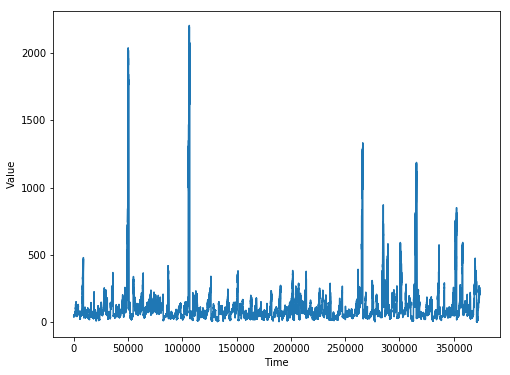

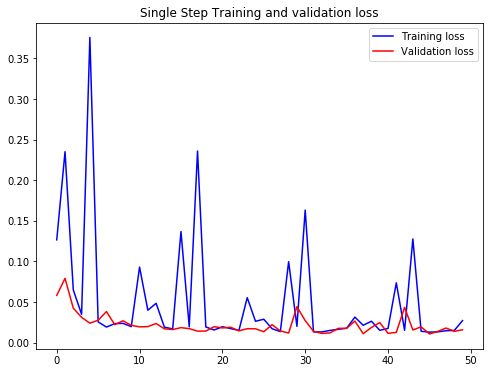

In [23]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')



In [24]:
#single_step_model.predict(x_val_single, batch_size=20, verbose=0)
single_step_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 64)            17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

In [25]:
#print(x_val_single.shape)
#print(x_val_single)
#print(y.shape)
print(data_std[3])
time=np.arange(len(dataset),dtype="float32")
timev=time[TRAIN_SPLIT:]
print(timev.shape)
print(dataset[-5:,3])


151.68836383941363
(37374,)
[0.95731609 0.95151472 0.940769   0.93536318 0.97017139]


In [32]:
#forecast = []


#for time in range(len(dataset) - past_history):
#  forecast.append(single_step_model.predict(dataset[time:time + past_history][np.newaxis]))

#forecast = forecast[TRAIN_SPLIT-past_history:]
#forecast = forecast[len(dataset)-past_history:]

#results = np.array(forecast)[:, 0, 0]
#print(results.shape)

#val_lapse=len(dataset)-TRAIN_SPLIT
#plt.figure(figsize=(10, 6))
#original_price=(dataset[-val_lapse:,3]*data_std[3])+data_mean[3] # To plot only Validation time

#original_price=(dataset[:,3]*data_std[3])+data_mean[3]
#adjusted_pred =(results*data_std[3])+data_mean[3]

#time=np.arange(len(dataset),dtype="float32") # Total study Time
#timev=time[past_history:] # Prediction time
#time_valid = time[TRAIN_SPLIT:]
#time_valid = time[split_time:]

#plot_series(time, original_price) 
#plot_series(timev, adjusted_pred)

KeyboardInterrupt: 

In [ ]:
forecast = []
up_real=0
down_real=0
up_r_up_pred=0
up_r_down_pred=0
d_r_up_pred=0
d_r_down_pred=0
mini_data=22000 # Original dataset len(dataset)
pred_ant=1000

for time in range(mini_data-2000,mini_data - past_history):
  forecast.append(single_step_model.predict(dataset[time:time + past_history][np.newaxis]))
  pred=single_step_model.predict(dataset[time:time + past_history][np.newaxis])
  if dataset[time+past_history,3]>dataset[time+past_history-1,3]:  # Up real
    up_real=up_real+1
    if pred > dataset[time+past_history-1,3]: 
      up_r_up_pred=up_r_up_pred+1 # Up Real Prediction Up 
    else:
      up_r_down_pred=up_r_down_pred+1 # Up real Prediction down
  else: # Down Real
    down_real=down_real+1
    if pred < dataset[time+past_history-1,3]: 
      d_r_down_pred=d_r_down_pred+1 # Down real prediction down
    else:
      d_r_up_pred=d_r_up_pred+1 # Down Real prediction up

#forecast = forecast[TRAIN_SPLIT-past_history:]
#forecast = forecast[len(dataset)-past_history:]

results = np.array(forecast)[:, 0, 0]
#print(results.shape)

val_lapse=len(dataset)-TRAIN_SPLIT
plt.figure(figsize=(10, 6))
#original_price=(dataset[-val_lapse:,3]*data_std[3])+data_mean[3] # To plot only Validation time

original_price=(dataset[:,3]*data_std[3])+data_mean[3]
adjusted_pred =(results*data_std[3])+data_mean[3]

time=np.arange(len(dataset),dtype="float32") # Total study Time
timev=time[past_history:] # Prediction time
#time_valid = time[TRAIN_SPLIT:]
#time_valid = time[split_time:]

#plot_series(time, original_price) 
#plot_series(timev, adjusted_pred)
print("Up_real:"+str(up_real))
print("Down_real:"+str(down_real))
print("Up Real Up Prediction:"+str(up_r_up_pred))
print("Up Real Down Prediction:"+str(up_r_down_pred))
print("Down Real Up Prediction:" + str(d_r_up_pred))
print("Down Real Down Prediction:" + str(d_r_down_pred))


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



class_names = ['NO Increase', 'Increase']



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylim([1.5, -.5])

    fmt = '.4f' if normalize else 'd'

    thresh = cm.max() - 0.05
    #plt.text(j, i, format(cm[i, j], fmt),

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #print (cm[i, j])
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 fontsize=24, 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Compute confusion matrix

train_cnf_matrix = np.array([[2034, 2169], [5492, 6225]]).T
eval_cnf_matrix = np.array([[27, 25], [3, 15]]).T
np.set_printoptions(precision=2)


# Set model for saving purposes

model = 'shallow_lstm'



# Plot normalized confusion matrix

plt.figure()

plot_confusion_matrix(train_cnf_matrix, classes=class_names, normalize=True)

plt.tight_layout()
plt.show()

#plt.savefig('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/confusion_matrices/%s_train.png' % model)



#plt.figure()

#plot_confusion_matrix(eval_cnf_matrix, classes=class_names, normalize=True)

#plt.savefig('confusion_matrixes/%s_val.png' % model)